# Vector Quantization using K-Means Algorithm

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Importing example image

In [2]:
from scipy.misc import face

In [3]:
racoon = face(gray=True)

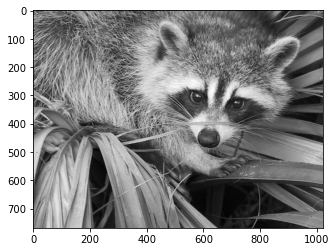

In [4]:
plt.imshow(racoon, cmap=plt.cm.gray);

#### Vector Quantization using k-means algorithm:

In [29]:
X = racoon.reshape((-1, 1))

n_clusters = 5
k_means = KMeans(n_clusters=n_clusters)
labels = k_means.fit_predict(X)

In [30]:
# cluster centers (squeeze - remove axes)
values = k_means.cluster_centers_.squeeze()

In [31]:
# replacing the labels with cluster centroids
racoon_compressed = np.choose(labels, values)

In [8]:
racoon.shape

(768, 1024)

In [9]:
# reshaping the array to original shape of image
racoon_compressed = racoon_compressed.reshape((768, 1024)).astype('int')

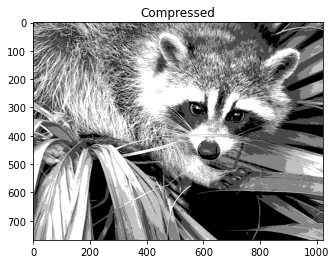

In [10]:
plt.imshow(racoon_compressed, cmap = plt.cm.gray);
plt.title('Compressed');

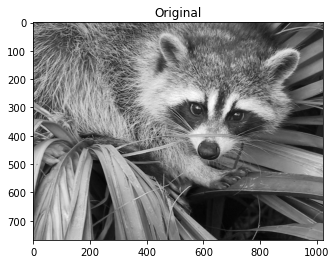

In [11]:
plt.imshow(racoon, cmap=plt.cm.gray);
plt.title('Original');

## Color image

In [12]:
from matplotlib import image

In [ ]:
# read the image
colored = image.imread('color_image.jpg')

In [ ]:
# show the image
plt.imshow(colored, cmap=plt.cm.hsv);

In [ ]:
# showing only RED colors
plt.imshow(colored[:,:,0], cmap=plt.cm.Reds);

In [ ]:
# showing only GREEN colors
plt.imshow(colored[:,:,1], cmap=plt.cm.Greens);

In [ ]:
# showing only BLUE colors
plt.imshow(colored[:,:,2], cmap=plt.cm.Blues);

---
## Practical work.
### Try to compress the color image. (Hint: compress every color separately and  concatenate them at the end)

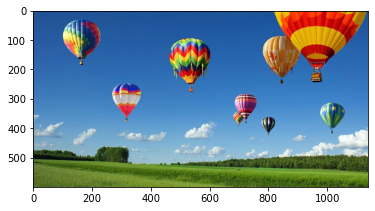

In [16]:
# read the image
balloon = image.imread('balloon.jpg')
plt.imshow(balloon, cmap=plt.cm.hsv);

In [48]:
balloon.shape

(600, 1140, 3)

In [21]:
balloon[:,:,0]

array([[ 38,  38,  38, ...,  22,  23,  24],
       [ 38,  38,  38, ...,  23,  24,  25],
       [ 38,  38,  38, ...,  24,  25,  27],
       ...,
       [ 92, 106,  82, ..., 109, 114, 120],
       [100, 102,  65, ...,  56,  36,  54],
       [ 83,  65,  62, ...,  61,  24,  36]], dtype=uint8)

In [44]:
# YOUR CODE
X= balloon[:,:,0].reshape(-1, 1)
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(X)
values = k_means.cluster_centers_.squeeze()
balloon_compressed_red = np.choose(labels, values)


In [45]:
X= balloon[:,:,1].reshape(-1, 1)
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(X)
values = k_means.cluster_centers_.squeeze()
balloon_compressed_green = np.choose(labels, values)


In [46]:
X= balloon[:,:,2].reshape(-1, 1)
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(X)
values = k_means.cluster_centers_.squeeze()
balloon_compressed_blue = np.choose(labels, values)


Because every color is reshaped to vector, you have to collect them in one array with size `(height, width, 3)`.

To do this, prepare every color array with size `(height, width, 3)`.

In [55]:
# this is a hint how to concatenate colors
balloon_new = np.concatenate((balloon_compressed_red.reshape(600,1140, 1), 
                              balloon_compressed_green.reshape(600, 1140, 1), 
                              balloon_compressed_blue.reshape(600,1140 , 1)), 
                              axis=2)

colored_new = balloon_new.astype('int')

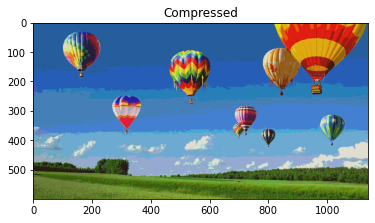

In [51]:
plt.imshow(colored_new, cmap=plt.cm.hsv);
plt.title('Compressed');

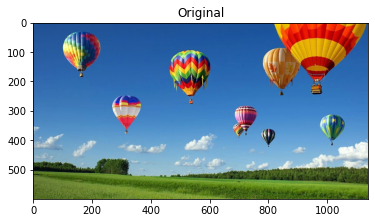

In [53]:
plt.imshow(balloon, cmap=plt.cm.hsv);
plt.title('Original');

In [58]:
itachi= image.imread('itachi.png')

In [79]:
itachi.shape

(813, 860, 4)

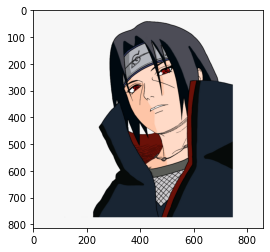

In [66]:
plt.imshow(itachi, cmap=plt.cm.hsv);

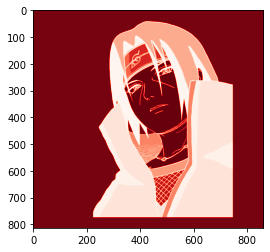

In [68]:
plt.imshow(itachi[:,:,0], cmap=plt.cm.Reds);

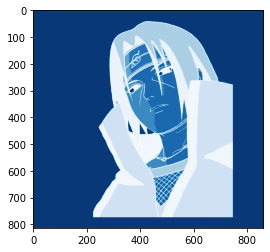

In [94]:
plt.imshow(itachi[:,:,2], cmap=plt.cm.Blues);

In [83]:
plt.imshow(itachi[:,:,3], cmap=plt.cm.Blues);

AttributeError: module 'matplotlib.cm' has no attribute 'Transparent'

In [75]:
X= itachi [:,:,0].reshape(-1, 1)
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(X)
values = k_means.cluster_centers_.squeeze()
itachi_compressed_red = np.choose(labels, values)


In [77]:
X= itachi [:,:,1].reshape(-1, 1)
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(X)
values = k_means.cluster_centers_.squeeze()
itachi_compressed_green = np.choose(labels, values)

In [80]:
X= itachi [:,:,2].reshape(-1, 1)
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(X)
values = k_means.cluster_centers_.squeeze()
itachi_compressed_blue = np.choose(labels, values)

In [81]:
X= itachi [:,:,3].reshape(-1, 1)
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(X)
values = k_means.cluster_centers_.squeeze()
itachi_compressed_trans_blue = np.choose(labels, values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


In [84]:
itachi_compressed_trans_blue

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [102]:
itachi_new = np.concatenate((itachi_compressed_red.reshape(813,860, 1), 
                              itachi_compressed_green.reshape(813, 860, 1), 
                              itachi_compressed_blue.reshape(813,860 , 1)),
                              axis=2)

itachi_new = itachi_new.astype('int')

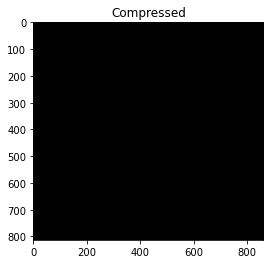

In [103]:
plt.imshow(itachi_new, cmap=plt.cm.hsv);
plt.title('Compressed');